# Check data structure

In [1]:
from pathlib import Path
import src.floor_plan as floor_plan
import src.utils as utils
import src.analysis as analysis

layout_path = Path("./layout_data/test_layout")
data_path = layout_path / Path("test_data_3")

# Load data
# FP: Floor plan
# AS_model: Activity sequence model
# WT_model: Walking trajectory model
# SD_model: Sensor data model
# AL_model: Anomaly label model
# AS: Activity sequence
# WT: Walking trajectories
# SD: Sensor data
# AL: Anomaly labels
FP = floor_plan.FloorPlan()
FP.load_layout(layout_path)
AS_model = utils.pickle_load(data_path, "AS_model")
WT_model = utils.pickle_load(data_path, "WT_model")
SD_model = utils.pickle_load(data_path, "SD_model")
AL_model = utils.pickle_load(data_path, "AL_model")
AS = utils.pickle_load(data_path, "AS")
WT = utils.pickle_load(data_path, "WT")
SD = utils.pickle_load(data_path, "SD")
AL = utils.pickle_load(data_path, "AL")

# check each data

# FP: Floor plan

# AS_model: Activity sequence model
print(f"[a for a in AS_model] : {[a for a in AS_model]}")

# WT_model: Walking trajectory model

# SD_model: Sensor data model
print(f"SD_model[0] : {SD_model[0]}")
print(f"Memory size of SD: {analysis.memory_size(SD)}")

# AL_model: Anomaly label model
print(f"[a for a in AL_model] : {[a for a in AL_model]}")

# AS: Activity sequence

# WT: Walking trajectories
print(f"WT[0]: {WT[0]}")
print(f"WT[0].centers : {WT[0].centers}")
print(f"len(WT[0].centers) : {len(WT[0].centers)}")
print(f"WT[0].timestamp : {WT[0].timestamp}")
print(f"WT[0].left_steps : {WT[0].left_steps}")
print(f"WT[0].right_steps : {WT[0].right_steps}")

# SD: Sensor data
print(f"SD[0] : {SD[0]}")

# AL: Anomaly lables
print(f"AL.keys() : {AL.keys()}")
AL_periods = analysis.make_AL_periods(data_path) # extract periods of anomalies
print(f"AL_periods: {AL_periods}")

utils.save_layout(layout_path, layout_path, sensors=SD_model,WT=[],
    show=False, color_map_name="Blues")

[a for a in AS_model] : ['fundamental_activities', 'necessary_activities', 'random_activities', 'walking_activities', 'fundamental_activity_order', 'sleep']
SD_model[0] : <Sensor>normal PIR(#0)(150.00, 150.00)
Memory size of SD: 18.07 MB
[a for a in AL_model] : ['housebound_go_out_num', 'housebound_go_out_duration', 'housebound_use_the_phone_num', 'housebound_use_the_phone_duration', 'semi_bedridden_nap_duration', 'semi_bedridden_rest_duration', 'semi_bedridden_go_out_num', 'semi_bedridden_go_out_duration', 'wandering_num', 'wandering_minute', 'fall_w_parameters', 'fall_s_parameters', 'forgetting_num']
WT[0]: <WalkingTrajectory> type: Direct from Bed (5:06:24.709113) to Sofa (5:06:29.509113)
WT[0].centers : [(-67.5, -22.5), (-12.5, -17.5), (37.5, 2.5), (87.5, 22.5), (142.5, 32.5), (197.5, 37.5), (247.5, 22.5)]
len(WT[0].centers) : 7
WT[0].timestamp : [datetime.timedelta(seconds=18384, microseconds=709113), datetime.timedelta(seconds=18385, microseconds=509113), datetime.timedelta(secon

# Floor plan

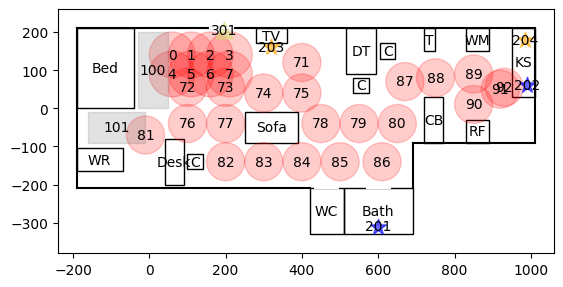

In [1]:
from pathlib import Path
import src.utils as utils
import src.sensor_model as sensor_model

layout_path = Path("./layout_data/test_layout")
sensors = sensor_model.test_sensors2
utils.save_layout(layout_path, layout_path, sensors=sensors,WT=[],
    show=True, color_map_name="Blues", filename="test_sensor_arangement",dpi=400,mark_point=[])

# gzip

In [2]:
from pathlib import Path
import src.utils as utils

layout_path = Path("./layout_data/test_layout")
path = layout_path / "test_data_3" / "experiment"

a = utils.pickle_load(path , "reduced_SD_mat_raw_1")
print(a.shape)
utils.pickle_dump(path, "reduced_SD_mat_raw_1", a, gzipped=True)

(73948819, 29)
(73948819, 29)
